# Workshop3
Gerardo Peña Pérez A01701474

IS THE RETURN OF INTEL HIGHER THAN AMD'S ???

In [6]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import numpy as np

In [12]:
INTEL = pdr.get_data_yahoo('INTC',
start="01/01/2017", interval="m")

AMD = pdr.get_data_yahoo('AMD',
start="01/01/2017", interval="m")

INTEL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,38.450001,36.189999,36.610001,36.820000,456335100.0,31.593973
2017-02-01,36.950001,34.840000,36.820000,36.200001,477551300.0,31.061975
2017-03-01,36.299999,34.660000,35.849998,36.070000,546151800.0,31.171379
2017-04-01,37.500000,35.209999,36.189999,36.150002,444122200.0,31.240511
2017-05-01,37.169998,35.020000,36.110001,36.110001,432927300.0,31.205940


In [13]:
INTEL["R"] = (INTEL["Adj Close"] / INTEL["Adj Close"].shift(1)) - 1
print(INTEL["R"])

AMD["R"] = (AMD["Adj Close"] / AMD["Adj Close"].shift(1)) - 1
print(AMD["R"])

Date
2017-01-01         NaN
2017-02-01   -0.016839
2017-03-01    0.003522
2017-04-01    0.002218
2017-05-01   -0.001107
                ...   
2022-05-01    0.019041
2022-06-01   -0.151154
2022-07-01   -0.029404
2022-08-01   -0.005508
2022-08-15    0.017089
Name: R, Length: 69, dtype: float64
Date
2017-01-01         NaN
2017-02-01    0.394407
2017-03-01    0.006224
2017-04-01   -0.085911
2017-05-01   -0.158647
                ...   
2022-05-01    0.191066
2022-06-01   -0.249264
2022-07-01    0.235386
2022-08-01    0.067323
2022-08-15    0.001190
Name: R, Length: 69, dtype: float64


In [14]:
sd_INTEL = INTEL["R"].std()
mn_INTEL = INTEL["R"].mean()
var_INTEL = INTEL["R"].var()
print(sd_INTEL)
print(mn_INTEL)


0.07324732442383547
0.004770703814662777


In [16]:
sd_AMD = AMD["R"].std()
mn_AMD = AMD["R"].mean()
var_AMD = AMD["R"].var()
print(sd_AMD)
print(mn_AMD)

0.164729869297787
0.047027332579389264


In [17]:
# h0 = mean(INTEL) > mean(AMD)
# ha = mean(INTEL) < mean(AMD)


t = (mn_INTEL - mn_AMD -0) / np.sqrt((1/36)*(var_INTEL + var_AMD))
print(t)

-1.4063618081945708


*** el retorno promedio de AMD es 1.406 SD mayor al de INTEL

# Measures of linear relationship

Covariance and

Correlation

In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


WHAT IF WE PLOT THE PRICES OF MSFT AND GSPC?

we could tell that the price of GSPC is much bigger, but due to both have different range of prices this is not enough information

<Figure size 432x288 with 0 Axes>

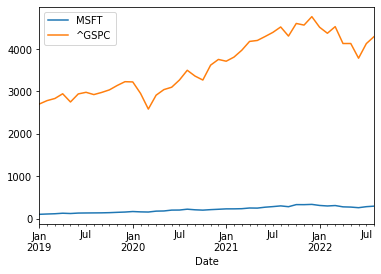

In [5]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

WE DIVIDE THE PRICE BY THE STOCK OF THE FIST MONTH, SO WE CAN HAVE A GROWTH FACTOR

In [6]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 432x288 with 0 Axes>

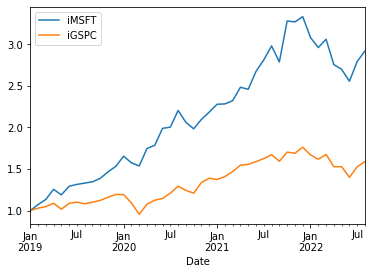

In [7]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [8]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [9]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


<Figure size 432x288 with 0 Axes>

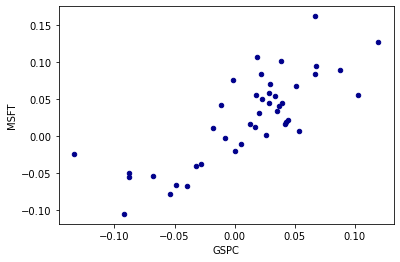

In [10]:
## A PLOT TO SEE THE RELATION BETWEEN THE RETURNS OD MSFT AND GSPC
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

We can notice that there is a correlation between these two variables (the return of MSFT and GSPC), because they both grow when the other one does 

<Figure size 432x288 with 0 Axes>

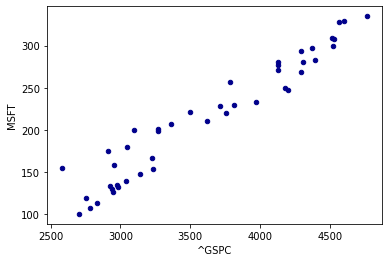

In [11]:
### NOW HERE WE HAVE THE PLOT FOR THE PRICES 
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

IN THE SECOND PLOT I CAN SEE A BETTER  LINEAR RELATION

<Figure size 432x288 with 0 Axes>

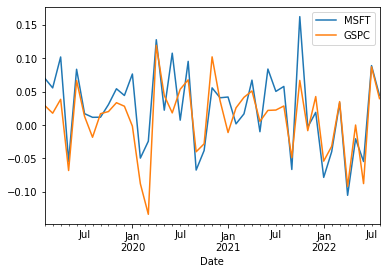

In [12]:
# LET'S TAKE A LOOK TO THE RETURNS 
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

# Covariance and correlation 

- Covariance:

    - Postive covariance = direct relation
    - Negative covariance = inverse relation

- Correlation:

    - Corr  = Cov(x,y) /SD(x)*SD(y)
    - -1 <= Corr <= 1
    - if corr is -1, X moves exactly like Y but to the other way
    - if corr is 1, X moves exactly like Y 
    - if 0, the are not related

In [13]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.00252310562865877

In [14]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00355477, 0.00252311],
       [0.00252311, 0.00285287]])

In [15]:
cov = covm[0,1]
cov

0.00252310562865877

In [16]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.79229771],
       [0.79229771, 1.        ]])

In [17]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7922977116325427

In [18]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

(0.7922977116325428, 2.4584483394424036e-10)